In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from seaborn import set_style
import kagglehub
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
set_style("whitegrid")

In [3]:
dst_stocks = pd.read_csv('DST_Finance_Stocks.csv')
weekend_stocks = pd.read_csv('Weekends_Finance_Stocks.csv')

In [4]:
dst_stocks['return'] = (dst_stocks['mon_open']-dst_stocks['fri_close'])/dst_stocks['fri_close']
weekend_stocks['return'] = (weekend_stocks['mon_open']-weekend_stocks['fri_close'])/weekend_stocks['fri_close']
dst_stocks['mon_range'] = dst_stocks['mon_high']-dst_stocks['mon_low']
dst_stocks['fri_range'] = dst_stocks['fri_high']-dst_stocks['fri_low']
weekend_stocks['mon_range'] = weekend_stocks['mon_high']-weekend_stocks['mon_low']
weekend_stocks['fri_range'] = weekend_stocks['fri_high']-weekend_stocks['fri_low']

dst_stocks['y'] = 1
weekend_stocks['y'] = 0

multivariable_fit_input = pd.DataFrame()
multivariable_fit_input['y'] = pd.concat([dst_stocks['y'],weekend_stocks['y']])
multivariable_fit_input['return'] = pd.concat([dst_stocks['return'],weekend_stocks['return']])
multivariable_fit_input['mon_volume'] = pd.concat([dst_stocks['mon_volume'],weekend_stocks['mon_volume']])
multivariable_fit_input['fri_volume'] = pd.concat([dst_stocks['fri_volume'],weekend_stocks['fri_volume']])
multivariable_fit_input['mon_range'] = pd.concat([dst_stocks['mon_range'],weekend_stocks['mon_range']])
multivariable_fit_input['fri_range'] = pd.concat([dst_stocks['fri_range'],weekend_stocks['fri_range']])
multivariable_fit_input = multivariable_fit_input.sample(frac=1).reset_index()

split80 = int(multivariable_fit_input.shape[0]*0.8)-1
multivariable_fit_train = multivariable_fit_input[:split80]
multivariable_fit_test = multivariable_fit_input[split80:]

In [5]:
X = np.concatenate([multivariable_fit_train[['return']].values],axis=-1)
y = multivariable_fit_train['y'].values
X.shape

(431340, 1)

In [6]:
svc = SVC(kernel='linear', C=0.1)
svc.fit(X,y)

SVC(C=0.1, kernel='linear')

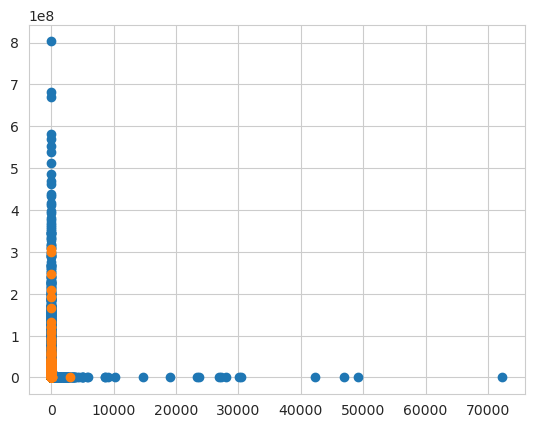

In [10]:
plt.clf()
plt.scatter(weekend_stocks['return'],weekend_stocks['mon_volume'])
plt.scatter(dst_stocks['return'],dst_stocks['mon_volume'])
plt.show()